<a href="https://colab.research.google.com/github/siddharthtumre/CV_Assignment2/blob/main/CV_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd
import numpy

### Load the MNIST dataset

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


### Normalizing the data

In [ ]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Sequential model

In [ ]:
model = keras.models.Sequential([
  keras.Input((28,28,1)),
  layers.Flatten(),
  layers.Dense(500, activation='relu'),
  layers.Dense(500, activation='relu'),
  layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 dense_2 (Dense)             (None, 10)                5010      
                                                                 
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
validation_split= 10000/x_train.shape[0]

In [ ]:
epochs = 250

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs=epochs, validation_split=validation_split)

Epoch 1/250
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1956 - accuracy: 0.9400 - val_loss: 0.1068 - val_accuracy: 0.9669
Epoch 2/250
1563/1563 [==============================] - 12s 7ms/step - loss: 0.0862 - accuracy: 0.9736 - val_loss: 0.0912 - val_accuracy: 0.9727
Epoch 3/250
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0572 - accuracy: 0.9820 - val_loss: 0.0986 - val_accuracy: 0.9730
Epoch 4/250
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0456 - accuracy: 0.9852 - val_loss: 0.0817 - val_accuracy: 0.9792
Epoch 5/250
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0340 - accuracy: 0.9893 - val_loss: 0.1122 - val_accuracy: 0.9723
Epoch 6/250
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0321 - accuracy: 0.9895 - val_loss: 0.1151 - val_accuracy: 0.9742
Epoch 7/250
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0224 - accuracy: 0.9931 - val_loss: 0.1149 -

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


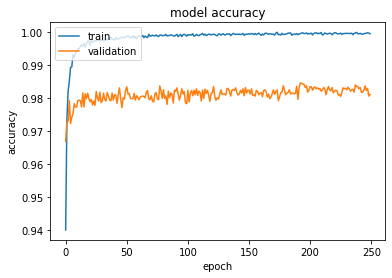

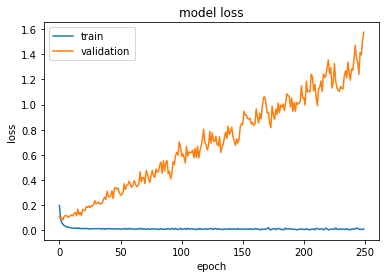

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.5302931070327759
Test accuracy: 0.98089998960495
